In [1]:
#  import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# import dataset
df = pd.read_csv("Housing Price data set.csv")

# prepare features
df['lotsize'] = df['lotsize'].div(1000)
df['price'] = df['price'].div(1000)
X = df[['lotsize', 'bedrooms']].values
x1 = np.ones((546,1))
X = np.append(x1, X, axis=1)
y = df[['price']].values

# split training & testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)



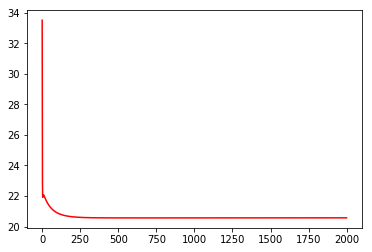

[[ 4.84836879]
 [ 6.29540896]
 [10.50837355]] 



In [3]:

# perform gradient descent
def performGD(X_train, y_train, theta):
    lmbda = 0.005
    alpha = 0.01
    size = X_train.shape[0]
    z1 = np.dot( X_train , theta)
    z2 = np.subtract(z1, y_train)
#     print(X_train.shape, z2.shape)
    
    z3 = np.dot( np.transpose(X_train), z2)
    z4 = z3*(alpha/size)
    z5 = theta*(1 - alpha*lmbda/size)
#     print(theta.shape, z4.shape)
#     return (z5 - z4)
    return (theta - z4) 

# linear reg
def linearReg(X_train, y_train, X_test, y_test):
    size = X_train.shape[1]
    theta = np.arange(1, size + 1).reshape((size,1))
    cal = []
    for it in range(2000):
        theta = performGD(X_train, y_train, theta)
        y_pred = np.dot( X_test, theta)
        y_size= y_pred.shape[0]
        c1 = (math.sqrt(np.mean((y_pred - y_test)**2)))
        cal.insert(len(cal),c1)
        
    c = np.arange(2000)
    cal1 = cal[:20]
    plt.plot(c, cal, 'r') 
#     plt.plot(c, y_test, 'b')
    plt.show()
    
    
    return theta

# call function

W = linearReg(X_train, y_train, X_test, y_test)

# print weights
print(W,"\n")
